# Ergodicity economics

An attempt to implement the simple game introduced by Ole Peters and collegues found in the [lecture notes](https://ergodicityeconomics.com/lecture-notes/).



## The game

The game is faily simple. 

- Flip a coin
- If it lands *heads*, you increase your wealth with 50%
- If it lands *tails*, you decrease your wealth with 40%

Would you accept the game?

In [1]:
### Playing the game

In [2]:
import numpy.random as random
from matplotlib import pyplot as plt
import numpy as np

In [3]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [4]:
# we start the game with a wealth of 1
inital_wealth = 1

# our wealth at the start of the game is our inital wealth
wealth = inital_wealth
wealth_t = []

# we play they game once a week, for a year
for i in range(1,53):
    # each flip has a 50/50 chance of either decreasing our wealth with 40%
    # or increasing with 50%
    coin_flip = random.choice([0.6, 1.5])
    wealth = wealth*coin_flip
    wealth_t.append(wealth)

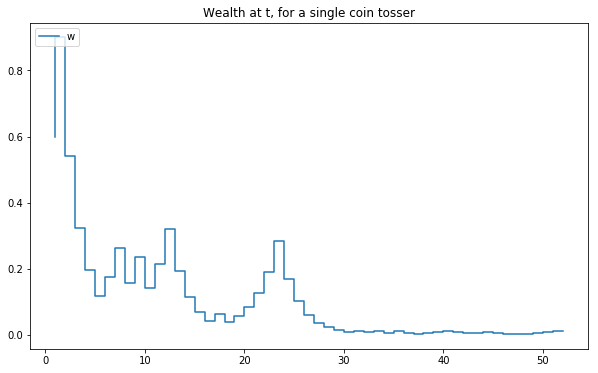

In [5]:
plt.step(range(1,53), wealth_t) 
plt.legend("wealth", loc='upper left')
plt.title("Wealth at t, for a single coin tosser")
plt.show()

This game shows a single trajectory for a game with a single player. This might not tell us that much about its statistical properties. Lets try running the game many times instead, to see if there is a clear trend of what outcome we can expect.

In [6]:
## just copy the above code

wealths = []
N = 100000

for player in range(1,N):
    # we start the game with a wealth of 1
    inital_wealth = 1
    # our wealth at the start of the game is our inital wealth
    wealth = inital_wealth
    # represents the history of wealths for a person at time t
    wealth_t = []
    
    wealth_t.append(wealth)

    # we play they game once a week, for a year
    for game in range(1,52):
        # each flip has a 50/50 chance of either decreasing our wealth with 40%
        # or increasing with 50%
        coin_flip = random.choice([0.6, 1.5])
        wealth = wealth*coin_flip
        
        """
        print(player)
        print(game)
        print(coin_flip)
        print(wealth)
        print("****")
        """
        
        wealth_t.append(wealth)
    ## an array with the result for each player at time t
    wealths.append(wealth_t)

In [7]:
# take the wealth at time t for each player, and average it
arr_all = np.array(wealths)

## select a random set of trajectories with different number of people
random_rows_10 = random.randint(0, arr_all.shape[0], size=10)
random_rows_1 = random.randint(0, arr_all.shape[0], size=1)
random_rows_100 = random.randint(0, arr_all.shape[0], size=100)
random_rows_1000 = random.randint(0, arr_all.shape[0], size=10000)

## Compute the enseble average over each size of sample trajectories
wealth_n_10_avg = arr_all[random_rows_10].mean(axis=0)
wealth_n_1_avg = arr_all[random_rows_1].mean(axis=0)
wealth_n_100_avg = arr_all[random_rows_100].mean(axis=0)
wealth_n_1000_avg = arr_all[random_rows_1000].mean(axis=0)
wealth_n_all_avg = arr_all.mean(axis=0)

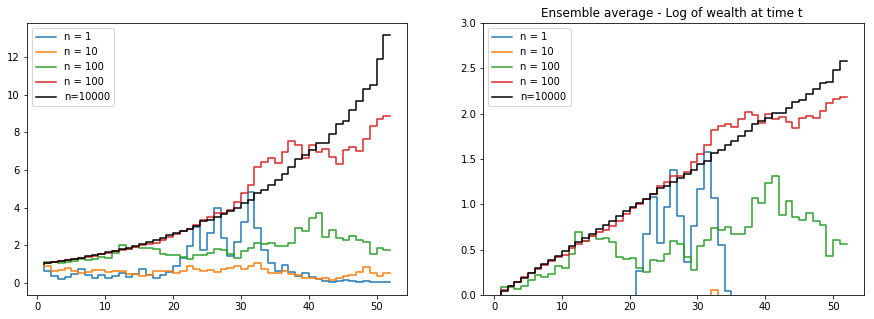

In [16]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
# plot a line for each sample size, normal scale
ax[0].step(x=range(1,53), y=wealth_n_1_avg)
ax[0].step(x=range(1,53), y=wealth_n_10_avg)
ax[0].step(x=range(1,53), y=wealth_n_100_avg)
ax[0].step(x=range(1,53), y=wealth_n_1000_avg)
ax[0].step(x=range(1,53), y=wealth_n_all_avg, c='k')
# format plot
ax[0].legend(['n = 1', 'n = 10', 'n = 100', 'n = 100', 'n=10000'], loc='upper left')
plt.ylim(0,10)
plt.title("Ensemble average - Change in wealth for different sample sizes")

# log scale

ax[1].step(x=range(1,53), y=log(wealth_n_1_avg))
ax[1].step(x=range(1,53), y=log(wealth_n_10_avg))
ax[1].step(x=range(1,53), y=log(wealth_n_100_avg))
ax[1].step(x=range(1,53), y=log(wealth_n_1000_avg))
ax[1].step(x=range(1,53), y=log(wealth_n_all_avg), c='k')

plt.ylim(0,3)
plt.legend(['n = 1', 'n = 10', 'n = 100', 'n = 100', 'n=10000'], loc='upper left')
plt.title("Ensemble average - Log of wealth at time t ")

We can see that adding more observations over time reduced fluctuations in the time series, and we can observe that playing this game for some time is indeed a good outome.

**BUT WAIT**

There is a flaw in this type of average, since it reflects a reality where a *single person would have access to many paralell games*. It is not necessarily the case that *my* returns will be that over the average of the *"market"*. THis is illustrated in a different way: with the time average.

In [17]:
inital_wealth = 1
# our wealth at the start of the game is our inital wealth
wealth = inital_wealth
# represents the history of wealths for a person at time t
wealth_t = []

wealth_t.append(wealth)

# we play they game once a week, for a few year
for game in range(1,1040):
    # each flip has a 50/50 chance of either decreasing our wealth with 40%
    # or increasing with 50%
    coin_flip = random.choice([0.6, 1.5])
    wealth = wealth*coin_flip

    wealth_t.append(wealth)

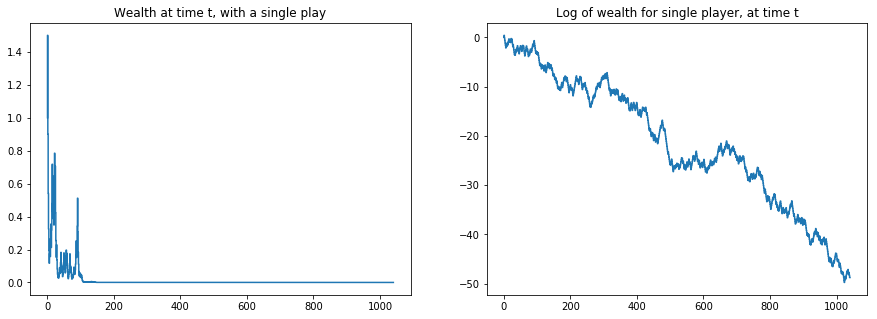

In [19]:
fig, t_avg_plt = plt.subplots(1,2, figsize=(15,5))
t_avg_plt[0].step(y=wealth_t, x=range(1,1041))
t_avg_plt[0].set_title("Wealth at time t, with a single play")
t_avg_plt[1].step(y=log(wealth_t), x=range(1,1041))
t_avg_plt[1].set_title("Log of wealth for single player, at time t")

Clearly, there is some discrepancy between what we can observe in the *enseble* and the *time* average. Depending on the one you choose to look at the situation, you either end up rich or end up bust.

The time average represents an important conceptual tool for how humans make decisions.

- Decisions are dependent on previous decisions
- By playing them over a long time, we can understand things we do not see otherwise. Turns out that this conceptual tool is useful for understanding decisions.

Instead of playing over many player, we play over a single one. But over a longer time period.